In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e1/sample_submission.csv
/kaggle/input/playground-series-s5e1/train.csv
/kaggle/input/playground-series-s5e1/test.csv


In [3]:
# Import the training and test data set
test_df = pd.read_csv("/kaggle/input/playground-series-s5e1/test.csv")
train_df = pd.read_csv("/kaggle/input/playground-series-s5e1/train.csv")

In [4]:
# Using the following command to do a high level investigation of the data set
train_df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [5]:
# Investigate the properties of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [6]:
# Verifying the train data set has how many null values, 
# and after execution we see that there are 8871 null values for teh feature 'num_sold'
train_df.isna().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

In [7]:
# Doing a comparison on the size of test and train data set
print(f"Shape of test dataframe : {test_df.shape}")
print(f"Shape of train dataframe : {train_df.shape}")


Shape of test dataframe : (98550, 5)
Shape of train dataframe : (230130, 6)


In [8]:
# For the training dataset display the summary statistics
train_df.describe(include = 'all')

,id,date,country,store,product,num_sold
count,230130.000000,230130,230130,230130,230130,221259.000000
unique,NaN,2557,6,3,5,NaN
top,NaN,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
freq,NaN,90,38355,76710,46026,NaN
mean,115064.500000,NaN,NaN,NaN,NaN,752.527382
std,66432.953062,NaN,NaN,NaN,NaN,690.165445
min,0.000000,NaN,NaN,NaN,NaN,5.000000
25%,57532.250000,NaN,NaN,NaN,NaN,219.000000
50%,115064.500000,NaN,NaN,NaN,NaN,605.000000
75%,172596.750000,NaN,NaN,NaN,NaN,1114.000000


In [9]:
# Drop the id column as that would have no impact on the model 
train_df = train_df.drop('id',axis=1)
test_df = test_df.drop('id',axis=1)

In [10]:
# Display the unique values within features - store, product and country
print(f"The Stores that sell sticker : {train_df['store'].unique()}")
print(f"The Products that are sold : {train_df['product'].unique()}")
print(f"The Country where stickers are sold : {train_df['country'].unique()}")

The Stores that sell sticker : ['Discount Stickers' 'Stickers for Less' 'Premium Sticker Mart']
The Products that are sold : ['Holographic Goose' 'Kaggle' 'Kaggle Tiers' 'Kerneler'
 'Kerneler Dark Mode']
The Country where stickers are sold : ['Canada' 'Finland' 'Italy' 'Kenya' 'Norway' 'Singapore']


In [11]:
# Subset the train data set with the ones having only null is the num_sold feature
# Analyse the dataset where num_sold has null values
train_df_null = train_df[train_df['num_sold'].isna()]
train_df_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8871 entries, 0 to 230085
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      8871 non-null   object 
 1   country   8871 non-null   object 
 2   store     8871 non-null   object 
 3   product   8871 non-null   object 
 4   num_sold  0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 415.8+ KB


In [12]:
# Display the statistical summary of the new data set - train_df_null
train_df_null.describe(include = 'all')

,date,country,store,product,num_sold
count,8871,8871,8871,8871,0.0
unique,2557,2,3,3,NaN
top,2010-04-21,Kenya,Discount Stickers,Holographic Goose,NaN
freq,7,4625,5179,8806,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


In [13]:
# Upon analysis we can see that there are only 3 products in this data set
train_df_null['product'].unique()

array(['Holographic Goose', 'Kerneler', 'Kerneler Dark Mode'],
      dtype=object)

In [14]:
# Check how many rows have what products in train data set and its subset
print(f" Number of rows with Holographic goose sticker with null values num_sold : {train_df_null['product'].value_counts()}")
print(f" Number of rows with Holographic goose sticker in train data set: {train_df['product'].value_counts()}")

 Number of rows with Holographic goose sticker with null values num_sold : product
Holographic Goose     8806
Kerneler                64
Kerneler Dark Mode       1
Name: count, dtype: int64
 Number of rows with Holographic goose sticker in train data set: product
Holographic Goose     46026
Kaggle                46026
Kaggle Tiers          46026
Kerneler              46026
Kerneler Dark Mode    46026
Name: count, dtype: int64


In [15]:
# Subset a df having only 'Holographic Goose'
# The purpose is to determine the median and if to analyse if we can replace 
# the null values for rows with Holographic Goose with this value
train_df_HG = train_df[train_df['product'] == 'Holographic Goose']
train_df_HG.describe(include = 'all')

,date,country,store,product,num_sold
count,46026,46026,46026,46026,37220.000000
unique,2557,6,3,1,NaN
top,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
freq,18,7671,15342,46026,NaN
mean,NaN,NaN,NaN,NaN,197.484363
std,NaN,NaN,NaN,NaN,120.249103
min,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,113.000000
50%,NaN,NaN,NaN,NaN,192.000000
75%,NaN,NaN,NaN,NaN,253.000000


In [16]:
# Median of num_sold 
median_HG = train_df_HG['num_sold'].median()

In [17]:
# Based on the above values my understanding is we can replace 
# the missing values of num_sold with the median value of 192 in the main training data set
# Before that drop the rows with the product 'Kerneler' with just 64 null num_sold and 
#                            'Kerneler Dark Mode' with only 1 null value for num_sold
train_df = train_df[~(((train_df['product'] == 'Kerneler Dark Mode') | (train_df['product'] == 'Kerneler')) & (train_df['num_sold'].isnull()))]


In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230065 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   date      230065 non-null  object 
 1   country   230065 non-null  object 
 2   store     230065 non-null  object 
 3   product   230065 non-null  object 
 4   num_sold  221259 non-null  float64
dtypes: float64(1), object(4)
memory usage: 10.5+ MB


In [19]:
# check for null values, whether it matches the null count for product 'Hologrphic goose'
train_df['num_sold'].isna().sum()

8806

In [20]:
# Fill the null values in teh train_df data set with median_HG
train_df['num_sold'] = train_df['num_sold'].fillna(192)

In [21]:
# Verify if there are any more null values in the data set
train_df['num_sold'].isna().sum()

0

In [22]:
train_df.isna().sum()
# There are no null values in the training data set now .

date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [23]:
# Verifying the mean and 50 percentile compared to initial train df and previous to filling null values
# they were 752.5 and 605.0 respectively
train_df.describe(include = 'all')

,date,country,store,product,num_sold
count,230065,230065,230065,230065,230065.000000
unique,2557,6,3,5,NaN
top,2010-01-01,Finland,Stickers for Less,Holographic Goose,NaN
freq,90,38355,76710,46026,NaN
mean,NaN,NaN,NaN,NaN,731.072558
std,NaN,NaN,NaN,NaN,685.318911
min,NaN,NaN,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,192.000000
50%,NaN,NaN,NaN,NaN,575.000000
75%,NaN,NaN,NaN,NaN,1084.000000


In [24]:
#Change the data type of date so that we can later extract the day month and year for doing analysis 
train_df['date'] = pd.to_datetime(train_df['date'])

In [25]:
# Analyse the dataset after makign changes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230065 entries, 0 to 230129
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   date      230065 non-null  datetime64[ns]
 1   country   230065 non-null  object        
 2   store     230065 non-null  object        
 3   product   230065 non-null  object        
 4   num_sold  230065 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 10.5+ MB


In [26]:
# Add columns after extracting the year, month and day from date and drop date column
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df = train_df.drop('date',axis=1)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230065 entries, 0 to 230129
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   230065 non-null  object 
 1   store     230065 non-null  object 
 2   product   230065 non-null  object 
 3   num_sold  230065 non-null  float64
 4   year      230065 non-null  int32  
 5   month     230065 non-null  int32  
 6   day       230065 non-null  int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 11.4+ MB


In [28]:
train_df.describe(include='all')

,country,store,product,num_sold,year,month,day
count,230065,230065,230065,230065.000000,230065.000000,230065.000000,230065.000000
unique,6,3,5,NaN,NaN,NaN,NaN
top,Finland,Stickers for Less,Holographic Goose,NaN,NaN,NaN,NaN
freq,38355,76710,46026,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,731.072558,2013.001530,6.523417,15.730959
std,NaN,NaN,NaN,685.318911,1.999939,3.448823,8.800786
min,NaN,NaN,NaN,5.000000,2010.000000,1.000000,1.000000
25%,NaN,NaN,NaN,192.000000,2011.000000,4.000000,8.000000
50%,NaN,NaN,NaN,575.000000,2013.000000,7.000000,16.000000
75%,NaN,NaN,NaN,1084.000000,2015.000000,10.000000,23.000000


In [29]:
# Do some analysis using visualization libraries like matplotlin and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

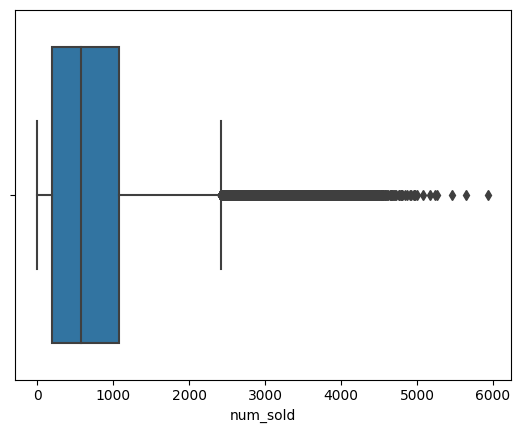

In [30]:
sns.boxplot(x=train_df['num_sold'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


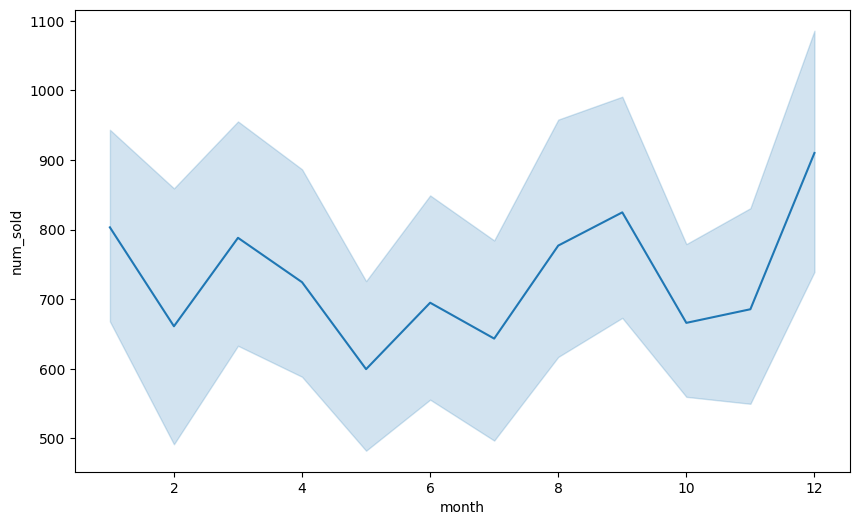

In [31]:
train_df_sample = train_df.sample(n=1000)
plt.figure(figsize=(10,6))
sns.lineplot(data = train_df_sample, x='month', y='num_sold')
plt.show()

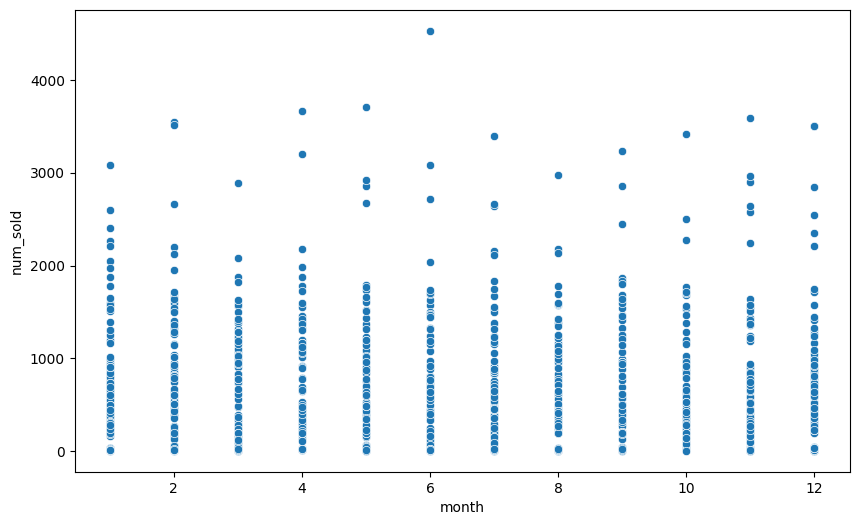

In [32]:
train_df_sample = train_df.sample(n=1000)
plt.figure(figsize=(10,6))
sns.scatterplot(data = train_df_sample, x='month', y='num_sold')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


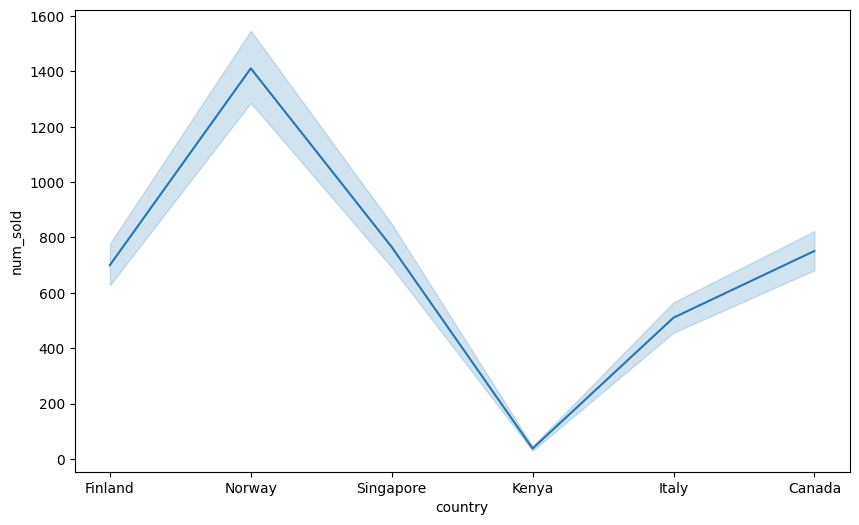

In [33]:
train_df_sample = train_df.sample(n=1000)
plt.figure(figsize=(10,6))
sns.lineplot(data = train_df_sample, x='country', y='num_sold')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


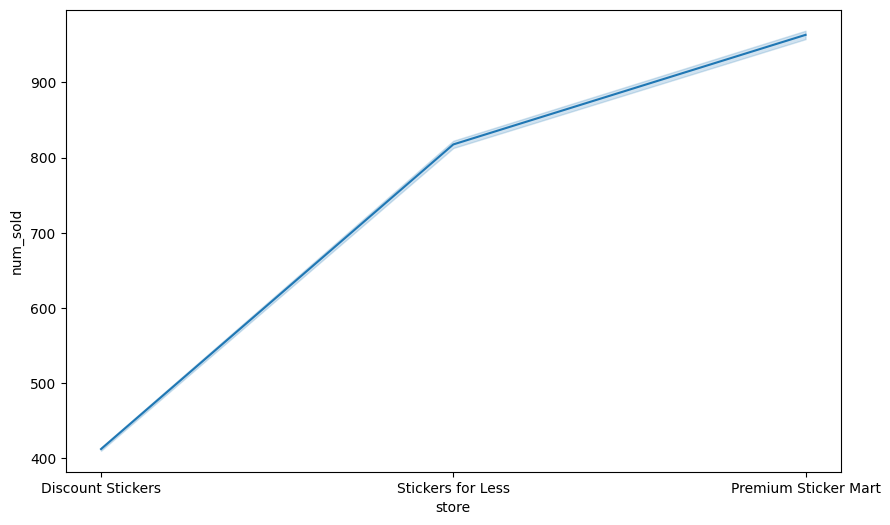

In [34]:
# train_df_sample = train_df.sample(n=1000)
plt.figure(figsize=(10,6))
sns.lineplot(data = train_df, x='store', y='num_sold')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


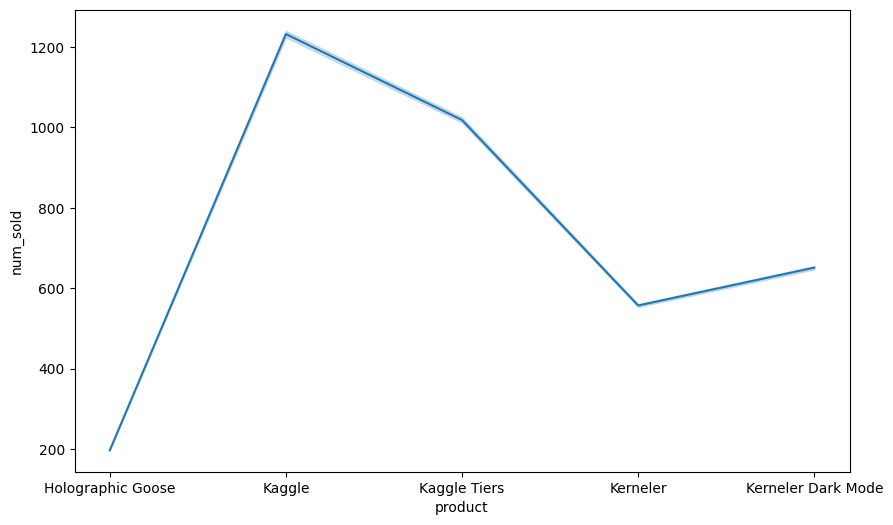

In [35]:
# train_df_sample = train_df.sample(n=1000)
plt.figure(figsize=(10,6))
sns.lineplot(data = train_df, x='product', y='num_sold')
plt.show()

In [36]:
# To reduce the memory usage change the data type of country, store and product to 'category'
train_df['country'] = train_df['country'].astype('category')
train_df['store'] = train_df['store'].astype('category')
train_df['product'] = train_df['product'].astype('category')

In [37]:
# Note that it has changed from 11 MB to 6.8 MB
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230065 entries, 0 to 230129
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   country   230065 non-null  category
 1   store     230065 non-null  category
 2   product   230065 non-null  category
 3   num_sold  230065 non-null  float64 
 4   year      230065 non-null  int32   
 5   month     230065 non-null  int32   
 6   day       230065 non-null  int32   
dtypes: category(3), float64(1), int32(3)
memory usage: 6.8 MB


In [38]:
# Label encode country, store, product
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['country_encoded'] = le.fit_transform(train_df['country'])
train_df['store_encoded'] = le.fit_transform(train_df['store'])
train_df['product_encoded'] = le.fit_transform(train_df['product'])
train_df.sample(n=40)

,country,store,product,num_sold,year,month,day,country_encoded,store_encoded,product_encoded
189992,Canada,Discount Stickers,Kaggle Tiers,556.0,2015,10,13,0,0,2
98151,Kenya,Stickers for Less,Kaggle,32.0,2012,12,26,3,2,1
133161,Kenya,Stickers for Less,Kaggle,43.0,2014,1,19,3,2,1
148116,Norway,Stickers for Less,Kaggle,2767.0,2014,7,4,4,2,1
26806,Singapore,Discount Stickers,Kaggle,650.0,2010,10,25,5,0,1
80066,Kenya,Premium Sticker Mart,Kaggle,40.0,2012,6,8,3,1,1
133436,Kenya,Premium Sticker Mart,Kaggle,42.0,2014,1,22,3,1,1
130957,Canada,Stickers for Less,Kaggle Tiers,1309.0,2013,12,26,0,2,2
95033,Singapore,Stickers for Less,Kerneler,749.0,2012,11,21,5,2,3
175716,Italy,Stickers for Less,Kaggle,891.0,2015,5,7,2,2,1


In [39]:
train_df_encoded = train_df.drop(['country','store','product'], axis = 1)
train_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 230065 entries, 0 to 230129
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   num_sold         230065 non-null  float64
 1   year             230065 non-null  int32  
 2   month            230065 non-null  int32  
 3   day              230065 non-null  int32  
 4   country_encoded  230065 non-null  int64  
 5   store_encoded    230065 non-null  int64  
 6   product_encoded  230065 non-null  int64  
dtypes: float64(1), int32(3), int64(3)
memory usage: 11.4 MB


In [40]:
# Analyse the test data set
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     98550 non-null  object
 1   country  98550 non-null  object
 2   store    98550 non-null  object
 3   product  98550 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB
None


In [41]:
test_df.describe(include='all')

,date,country,store,product
count,98550,98550,98550,98550
unique,1095,6,3,5
top,2017-01-01,Canada,Discount Stickers,Holographic Goose
freq,90,16425,32850,19710


In [42]:
test_df.isna().sum()

date       0
country    0
store      0
product    0
dtype: int64

In [43]:
# Perform manipulations same as done for train data
test_df['date'] = pd.to_datetime(test_df['date'])
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df = test_df.drop('date',axis=1)
test_df['country_encoded'] = le.fit_transform(test_df['country'])
test_df['store_encoded'] = le.fit_transform(test_df['store'])
test_df['product_encoded'] = le.fit_transform(test_df['product'])
test_df_encoded = test_df.drop(['country','store','product'], axis = 1)
test_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98550 entries, 0 to 98549
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   year             98550 non-null  int32
 1   month            98550 non-null  int32
 2   day              98550 non-null  int32
 3   country_encoded  98550 non-null  int64
 4   store_encoded    98550 non-null  int64
 5   product_encoded  98550 non-null  int64
dtypes: int32(3), int64(3)
memory usage: 3.4 MB


We now have the train data set - train_df_encoded
&
test data set - test_df_encoded

In [44]:
# Create ML model using basic Linear Regression
from sklearn.linear_model import LinearRegression

In [45]:
X = train_df_encoded.drop(['num_sold','day'], axis = 1)
y = train_df_encoded['num_sold']


In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X,y)

LinearRegression()

In [48]:
# The model accuracy is 82%
lr.score(X,y)

0.08212871717053716